In [1]:
# Initial imports
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)
from libs.drew_lib import *
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\altma\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
asset_dataframe_list = []
for asset in keywords:

    asset_dataframe = pd.read_csv(f'./Data/Cleaned_Data/test/{asset}.csv', parse_dates = True, infer_datetime_format = True)
    asset_dataframe = asset_dataframe.set_index('Unnamed: 0')
    asset_dataframe.index.name = 'date'
    asset_dataframe.index = pd.to_datetime(asset_dataframe.index)
    cols = ['stockmarket_positive_sentiment',
        'stockmarket_negative_sentiment',
        'stockmarket_neutral_sentiment',	
        'stockmarket_compound_sentiment',
        'volume',
        'close'
    ]
    asset_dataframe = asset_dataframe[cols]
    asset_dataframe.rename(columns={
        'stockmarket_compound_sentiment':'r/stockmarket_compound',
        'stockmarket_positive_sentiment':'r/stockmarket_pos',
        'stockmarket_neutral_sentiment':'r/stockmarket_neu',
        'stockmarket_negative_sentiment':'r/stockmarket_neg'
    },inplace=True)

    asset_dataframe_list.append(asset_dataframe)

In [87]:
asset_sec_list = []
for asset in keywords:

    asset_dataframe = pd.read_csv(f'./Data/Cleaned_Data/SEC_sentiment_and_stocks/{asset}.csv', parse_dates = True, infer_datetime_format = True)
    asset_dataframe = asset_dataframe.set_index('date')
    asset_dataframe.index = pd.to_datetime(asset_dataframe.index)
    asset_dataframe.drop(asset_dataframe.columns[-3:],axis=1,inplace=True)
    asset_dataframe.rename(columns={
        'pos':'sec_pos',
        'neg':'sec_neg',
        'neu':'sec_neu',
        'compound':'sec_compound'
    },inplace=True)

    asset_sec_list.append(asset_dataframe)

In [88]:
NFLX = pd.concat([asset_sec_list[0],asset_dataframe_list[0]],axis=1,join='outer')
FB = pd.concat([asset_sec_list[1],asset_dataframe_list[1]],axis=1,join='outer')
UBER = pd.concat([asset_sec_list[2],asset_dataframe_list[2]],axis=1,join='outer')
MCHP = pd.concat([asset_sec_list[3],asset_dataframe_list[3]],axis=1,join='outer')
ABNB = pd.concat([asset_sec_list[4],asset_dataframe_list[4]],axis=1,join='outer')
FANG = pd.concat([asset_sec_list[5],asset_dataframe_list[5]],axis=1,join='outer')
MRO = pd.concat([asset_sec_list[6],asset_dataframe_list[6]],axis=1,join='outer')
DVN = pd.concat([asset_sec_list[7],asset_dataframe_list[7]],axis=1,join='outer')
SPWR = pd.concat([asset_sec_list[8],asset_dataframe_list[8]],axis=1,join='outer')
REGI = pd.concat([asset_sec_list[9],asset_dataframe_list[9]],axis=1,join='outer')
MTRX = pd.concat([asset_sec_list[10],asset_dataframe_list[10]],axis=1,join='outer')
BLK = pd.concat([asset_sec_list[11],asset_dataframe_list[11]],axis=1,join='outer')
PYPL = pd.concat([asset_sec_list[12],asset_dataframe_list[12]],axis=1,join='outer')
MELI = pd.concat([asset_sec_list[13],asset_dataframe_list[13]],axis=1,join='outer')
SOFI = pd.concat([asset_sec_list[14],asset_dataframe_list[14]],axis=1,join='outer')

In [89]:
def fill_and_bin(df):
    #df = return_bin(df)
    #df['return_bin'] = df['return_bin'].fillna('no gain/loss')
    #df['returns'] = df['returns'].fillna(0)
    df[['r/stockmarket_compound','r/stockmarket_pos','r/stockmarket_neu','r/stockmarket_neg','close']] = df[['r/stockmarket_compound','r/stockmarket_pos','r/stockmarket_neu','r/stockmarket_neg','close']].fillna(method='ffill')
    df['volume'] = df['volume'].fillna(df['volume'].mean())
    return df

In [90]:
ticker_df_list = [NFLX,FB,UBER,MCHP,ABNB,FANG,MRO, DVN, SPWR,REGI,MTRX,BLK, PYPL,MELI,SOFI]
[fill_and_bin(df) for df in ticker_df_list]

[           ticker  sec_pos  sec_neg  sec_neu  sec_compound  r/stockmarket_pos  \
 date                                                                            
 2015-12-01   NFLX    0.110    0.024    0.865        1.0000           0.061000   
 2015-12-02   NFLX    0.110    0.024    0.865        1.0000           0.158714   
 2015-12-03   NFLX    0.110    0.024    0.865        1.0000           0.158714   
 2015-12-04   NFLX    0.110    0.024    0.865        1.0000           0.362000   
 2015-12-07   NFLX    0.110    0.024    0.865        1.0000           0.266000   
 ...           ...      ...      ...      ...           ...                ...   
 2022-05-25   NFLX    0.127    0.040    0.833        0.9999           0.016000   
 2022-05-26   NFLX    0.127    0.040    0.833        0.9999           0.103000   
 2022-05-27   NFLX    0.127    0.040    0.833        0.9999           0.103000   
 2022-05-31   NFLX    0.127    0.040    0.833        0.9999           0.097500   
 2022-06-01   NF

In [92]:
NFLX['mean_compound'] = NFLX[['sec_compound','r/stockmarket_compound']].mean(axis=1)
NFLX

,ticker,sec_pos,sec_neg,sec_neu,sec_compound,r/stockmarket_pos,r/stockmarket_neg,r/stockmarket_neu,r/stockmarket_compound,volume,close,mean_compound
date,,,,,,,,,,,,
2015-12-01,NFLX,0.110,0.024,0.865,1.0000,0.061000,0.028000,0.911000,0.640500,1.255076e+07,125.37,0.820250
2015-12-02,NFLX,0.110,0.024,0.865,1.0000,0.158714,0.047571,0.793857,0.441443,2.410571e+07,128.93,0.720721
2015-12-03,NFLX,0.110,0.024,0.865,1.0000,0.158714,0.047571,0.793857,0.441443,2.664454e+07,126.81,0.720721
2015-12-04,NFLX,0.110,0.024,0.865,1.0000,0.362000,0.000000,0.638000,0.910000,2.025041e+07,130.93,0.955000
2015-12-07,NFLX,0.110,0.024,0.865,1.0000,0.266000,0.000000,0.734000,0.964300,2.335153e+07,125.36,0.982150
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-25,NFLX,0.127,0.040,0.833,0.9999,0.016000,0.177750,0.806250,-0.380950,8.488881e+06,187.83,0.309475
2022-05-26,NFLX,0.127,0.040,0.833,0.9999,0.103000,0.093250,0.803750,0.042725,8.039904e+06,191.40,0.521312
2022-05-27,NFLX,0.127,0.040,0.833,0.9999,0.103000,0.093250,0.803750,0.042725,8.567288e+06,195.19,0.521312


In [28]:
# def window_data(df, window):
#     """
#     This function accepts the column number for the features (X) and the target (y).
#     It chunks the data up with a rolling window of Xt - window to predict Xt.
#     It returns two numpy arrays of X and y.
#     """
#     X = []
#     y = []
#     for i in range(len(df) - window):
#         features = df.iloc[i : (i + window), 1:-1]
#         target = df.iloc[(i + window), -1]
#         X.append(features)
#         y.append(target)
#     return np.array(X), np.array(y).reshape(-1, 1)

In [29]:
# window = 30
# X, y = window_data(NFLX, window)

# #print (f"X sample values:\n{X[:5]} \n")
# #print (f"y sample values:\n{y[:5]}")


In [36]:
# X = X.reshape(-1,1)

In [ ]:
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# scaler = MinMaxScaler()
# # enc = OneHotEncoder()
# #enc.fit(y_train)

# # y_train_enc = enc.transform(y_train).toarray()
# # y_test_enc = enc.transform(y_test).toarray()

# # Fit the MinMaxScaler object with the training feature data X_train
# #nsamples, nx, ny = X_train.shape
# #X_train = X_train.reshape(nsamples,nx*ny)

# scaler.fit(X_train)

# # Scale the features training and testing sets
# X_train_scaled = scaler.transform(X_train)

# # nsamples, nx, ny = X_test.shape
# # X_test = X_test.reshape(nsamples,nx*ny)

# X_test_scaled = scaler.transform(X_test)

# # Fit the MinMaxScaler object with the training target data y_train

# scaler.fit(y_train)

# # # # # Scale the target training and testing sets
# y_train_scaled = scaler.transform(y_train)
# y_test_scaled = scaler.transform(y_test)

In [65]:
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [93]:
window_size = 30

feature_column = 11
target_column = 10
X, y = window_data(NFLX, window_size, feature_column, target_column)
print (f"X sample values:\n{X[:5]} \n")
print (f"y sample values:\n{y[:5]}")

X sample values:
[[0.82025    0.72072143 0.72072143 0.955      0.98215    0.98215
  0.98215    0.98215    0.98215    0.98215    0.98215    0.98215
  0.98215    0.98215    0.98215    0.98215    0.98215    0.98215
  0.98215    0.98215    0.98215    0.98215    0.98215    0.98215
  0.79295    0.79295    0.5        0.5        0.5        0.5       ]
 [0.72072143 0.72072143 0.955      0.98215    0.98215    0.98215
  0.98215    0.98215    0.98215    0.98215    0.98215    0.98215
  0.98215    0.98215    0.98215    0.98215    0.98215    0.98215
  0.98215    0.98215    0.98215    0.98215    0.98215    0.79295
  0.79295    0.5        0.5        0.5        0.5        0.5       ]
 [0.72072143 0.955      0.98215    0.98215    0.98215    0.98215
  0.98215    0.98215    0.98215    0.98215    0.98215    0.98215
  0.98215    0.98215    0.98215    0.98215    0.98215    0.98215
  0.98215    0.98215    0.98215    0.98215    0.79295    0.79295
  0.5        0.5        0.5        0.5        0.5        0.5     

In [94]:
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

In [95]:
# Use the MinMaxScaler to scale data between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the training feature data X_train
scaler.fit(X_train)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the training target data y_train
scaler.fit(y_train)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [96]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print (f"X_train sample values:\n{X_train[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}")

X_train sample values:
[[[0.81980548]
  [0.71923348]
  [0.71923348]
  [0.95596817]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.79221927]
  [0.79221927]
  [0.49619805]
  [0.49619805]
  [0.49619805]
  [0.49619805]]

 [[0.71923348]
  [0.71923348]
  [0.95596817]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 ]
  [0.79221927]
  [0.79221927]
  [0.49619805]
  [0.49619805]
  [0.49619805]
  [0.49619805]
  [0.49619805]]

 [[0.71923348]
  [0.95596817]
  [0.9834028 ]
  [0.9834028 ]
  [0.9834028 

In [97]:
# Define the LSTM RNN model.
model = Sequential()

number_units = 5
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))

In [98]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [99]:
# Summarize the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 5)             140       
                                                                 
 dropout_9 (Dropout)         (None, 30, 5)             0         
                                                                 
 lstm_10 (LSTM)              (None, 30, 5)             220       
                                                                 
 dropout_10 (Dropout)        (None, 30, 5)             0         
                                                                 
 lstm_11 (LSTM)              (None, 5)                 220       
                                                                 
 dropout_11 (Dropout)        (None, 5)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [101]:
# Train the model
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=1, verbose=1)

Epoch 1/10
1130/1130 [==============================] - 9s 8ms/step - loss: 0.0515
Epoch 2/10
1130/1130 [==============================] - 9s 8ms/step - loss: 0.0489
Epoch 3/10
1130/1130 [==============================] - 9s 8ms/step - loss: 0.0401
Epoch 4/10
1130/1130 [==============================] - 9s 8ms/step - loss: 0.0321
Epoch 5/10
1130/1130 [==============================] - 9s 8ms/step - loss: 0.0422
Epoch 6/10
1130/1130 [==============================] - 9s 8ms/step - loss: 0.0443
Epoch 7/10
1130/1130 [==============================] - 9s 8ms/step - loss: 0.0471
Epoch 8/10
1130/1130 [==============================] - 9s 8ms/step - loss: 0.0486
Epoch 9/10
1130/1130 [==============================] - 9s 8ms/step - loss: 0.0505
Epoch 10/10
1130/1130 [==============================] - 9s 8ms/step - loss: 0.0382


In [102]:
# Evaluate the model
model.evaluate(X_test, y_test)

16/16 [==============================] - 1s 3ms/step - loss: 0.1155


0.11546236276626587

In [103]:
# Make some predictions
predicted = model.predict(X_test)

In [104]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [105]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
    }, index = NFLX.index[-len(real_prices): ])
stocks.head()

,Real,Predicted
date,,
2020-06-30,455.04,421.922699
2020-07-01,485.64,421.928314
2020-07-02,476.89,421.926849
2020-07-06,493.81,421.922791
2020-07-07,493.16,421.726776


<AxesSubplot:xlabel='date'>

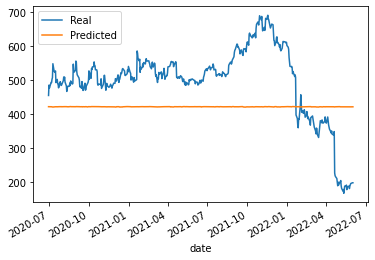

In [106]:
# Plot the real vs predicted prices as a line chart
stocks.plot()